In [2]:

import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [151]:

df = pd.read_csv('movieData.csv')
df2 = pd.read_csv('final_movies.csv')

In [152]:
df2.shape

(9980, 9)

In [153]:
df2.columns = map(str.title, df2.columns)
df2.rename(columns={'Release_Date':'Year','Genre_Names':'Genre'},inplace = True)
df2.dropna(subset = ['Year'], inplace = True)
df2['Year']=df2['Year'].astype(int)

In [154]:
df['Genre']

0         Comedy Drama Thriller
1         Horror Mystery Sci-Fi
2            Comedy Crime Drama
3       Action Adventure Comedy
4              Comedy Drama War
                 ...           
4781       Comedy Drama Romance
4782               Comedy Drama
4783               Comedy Drama
4784       Comedy Drama Romance
4785                      Drama
Name: Genre, Length: 4786, dtype: object

In [146]:
merged = pd.merge(left = df, right = df2, on=['Title', 'Year'])

In [155]:
merged.head()
df.loc[df['Title'] == 'Fight Club']

,Title,Year,Genre,Rating,Score,Director,Stars,Gross
93,Fight Club,1999,Drama,8.8,66.0,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",37030102


In [159]:
df2['Genre']

0                                ['Mystery', 'Horror']
1                                      ['Documentary']
2             ['Thriller', 'Drama', 'Crime', 'Horror']
3                                 ['Drama', 'Romance']
4       ['Animation', 'Fantasy', 'Family', 'TV Movie']
                             ...                      
9975                                               NaN
9976                                               NaN
9977                                               NaN
9978                                               NaN
9979                                               NaN
Name: Genre, Length: 9837, dtype: object

In [149]:
df2.loc[df2['Title']=='Fight Club']

,Popularity,Vote_Count,Vote_Average,Title,Year,Original_Language,Revenue,Budget,Genre
102,34.164,18240,8.4,Fight Club,1999,en,100853753.0,63000000.0,NaN
5490,34.164,18240,8.4,Fight Club,1999,en,100853753.0,63000000.0,NaN


In [45]:
merged.loc[merged['Title']=='Fight Club']

,Title,Year,Genre_x,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,Vote_Average,Original_Language,Revenue,Budget,Genre_y
4,Fight Club,1999,['Drama'],8.8,66.0,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...","$37,030,102",34.164,18240,8.4,en,100853753.0,63000000.0,NaN
5,Fight Club,1999,['Drama'],8.8,66.0,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...","$37,030,102",34.164,18240,8.4,en,100853753.0,63000000.0,NaN


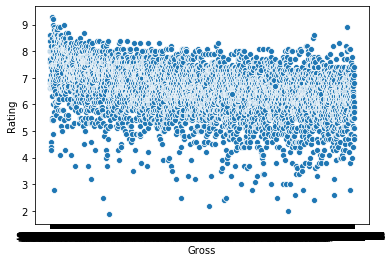

In [31]:
gross = df['Gross']
rating = df['Rating']
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)


In [65]:
df.corr()

,Year,Rating,Score,Gross
Year,1.000000,-0.130756,0.016249,0.116574
Rating,-0.130756,1.000000,0.572534,0.195053
Score,0.016249,0.572534,1.000000,0.216491
Gross,0.116574,0.195053,0.216491,1.000000


In [136]:
score = df[['Director','Gross','Score']].groupby('Score').mean().sort_values('Gross', ascending = False)

rating = df[['Director','Gross','Rating']].groupby('Rating').mean().sort_values('Gross', ascending = False)

genres = df[['Director','Gross','Genre']].groupby('Genre').mean().sort_values('Gross', ascending = False)




In [137]:
score['Score']=score.index
rating['Rating']=rating.index
genres['Genres']=genres.index
rating['Log Gross']=np.log(rating['Gross'])
score.reset_index(drop = True, inplace = True)
rating.reset_index(drop = True, inplace = True)
genres.reset_index(drop = True, inplace = True)

In [122]:
score

,Gross,Score
0,1.250016e+08,0
1,1.100475e+08,1
2,9.140579e+07,2
3,8.591254e+07,3
4,8.463281e+07,4
...,...,...
92,1.419042e+07,92
93,1.273358e+07,93
94,7.888703e+06,94
95,7.375316e+06,95


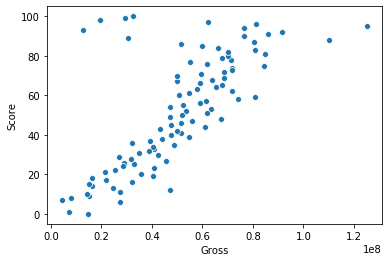

In [53]:
ax = sns.scatterplot(x = 'Gross',y = 'Score', data = score)

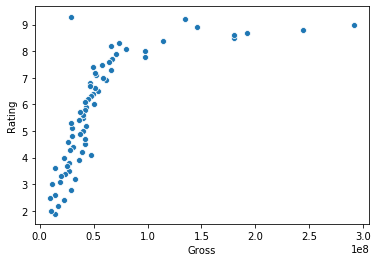

In [54]:
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = rating)

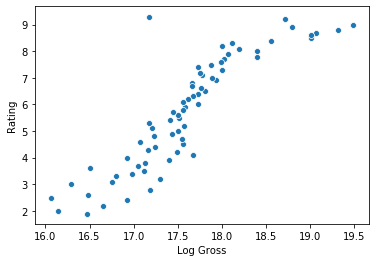

In [55]:
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = rating)

In [20]:
rating.corr()

,Gross,Rating,Log Gross
Gross,1.000000,0.711173,0.891863
Rating,0.711173,1.000000,0.877963
Log Gross,0.891863,0.877963,1.000000


In [138]:
genres['Genres'] = genres['Genres'].apply(lambda x:x.split())

In [185]:
genres['Genres1'] = genres['Genres'].apply(lambda x:x[0])

In [177]:
def genres_Split(list):
    try:
        x = list[1]
    except:
        x = list[0]
    return x
def genres_Split2(list):
    try:
        x = list[2]
    except:
        x = list[0]
    return x

In [187]:
genres['Genres2'] = genres['Genres'].apply(lambda x:genres_Split(x))
genres['Genres3'] = genres['Genres'].apply(lambda x:genres_Split2(x))


In [183]:
genres['Genres'][0]

['Adventure', 'Drama', 'Sci-Fi']

In [188]:
genres

,Gross,Genres,Genres1,Genres2,Genres3
0,2.242822e+08,"[Adventure, Drama, Sci-Fi]",Adventure,Drama,Sci-Fi
1,2.214757e+08,"[Family, Sci-Fi]",Family,Sci-Fi,Family
2,1.899691e+08,"[Musical, Romance]",Musical,Romance,Musical
3,1.841471e+08,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi
4,1.774741e+08,"[Action, Adventure]",Action,Adventure,Action
...,...,...,...,...,...
334,5.074630e+05,"[Romance, Thriller]",Romance,Thriller,Romance
335,4.580000e+05,"[Musical, Romance, War]",Musical,Romance,War
336,4.014630e+05,"[Comedy, Thriller]",Comedy,Thriller,Comedy
337,3.032300e+05,"[Family, Fantasy, Horror]",Family,Fantasy,Horror
